# Illustrate the iEGM through the Buffer-Stock Model

## Monte Carlo Settings

In [1]:
MC_num = 20 #200 # number of Monte Carlo simulations
C_num_grid = (10,20,50,100,200) # number of grid points in consumption grid i iEGM
specs = { # common specifications across methods
    'rho':1.5,

    'max_C':10.0,
    'max_m':5.0,

    'num_m':150,
    'T': 20,

    'simN':10_000,

} 

## Load relevant packages

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
from time import time
import matplotlib.pyplot as plt
from BufferStockModel import BufferStockModelClass

plt.rcParams.update({'font.size': 14})

## Illustrate the pre-computation of consumption interpolator

In [3]:
# load local model file and initialize model class
SAVE = True
specs_illustrate = {
    'rho':1.5,

    'num_C':10,
    'max_C':5.0,
    'unequal_C':1.5,
}

model = BufferStockModelClass(par=specs_illustrate)
par = model.par

# pre-compute consumption
model.precompute_C()

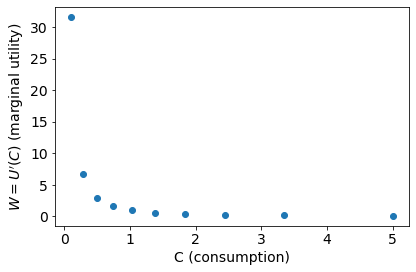

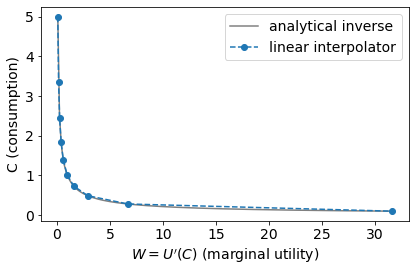

In [4]:
# illustrate the iEGM pre-computation
fig, ax = plt.subplots()
ax.scatter(par.grid_C,par.grid_marg_U)
ax.set(xlabel='C (consumption)',ylabel="$W=U\'(C)$ (marginal utility)");
fig.tight_layout()
fig.savefig('output/fig_illustrate_flip1.pdf')

fig, ax = plt.subplots()
fine_grid = np.linspace(par.grid_marg_U_flip[0],par.grid_marg_U_flip[-1],200)
ax.plot(fine_grid,model.inv_marg_util(fine_grid),color='gray',label='analytical inverse')
ax.plot(par.grid_marg_U_flip,par.grid_C_flip,marker='o',linestyle='--',color='tab:blue',label='linear interpolator');
ax.set(xlabel='$W=U\'(C)$ (marginal utility)',ylabel="C (consumption)");
ax.legend();
fig.tight_layout()
if SAVE: fig.savefig('output/fig_illustrate_flip2.pdf')

## Solve the model using VFI, EGM and iEGM

In [5]:
# specs_now = {
#     'rho':1.5,

#     'num_C':100,
#     'max_C':5.0,
#     'max_m':5.0,

#     'num_m':100,
#     'T': 20,

#     'simN':10_000,
# }

# model = BufferStockModelClass(par=specs_now)

In [6]:
# model.par.method='vfi'
# print(f'{model.par.method}:')
# %timeit model.solve()

# model.simulate()
# print(f'avg. log10 Euler error: {model.sim.mean_log10_euler:.3f} \n')


# model.par.method='egm'
# model.par.interp_inverse = False
# print(f'{model.par.method}:')
# %timeit model.solve()

# model.simulate()
# print(f'avg. log10 Euler error: {model.sim.mean_log10_euler:.3f} \n')


# model.par.method='iegm'
# model.par.interp_method = 'linear'
# model.par.interp_inverse = False
# print(f'{model.par.method}:')
# %timeit model.solve()

# model.simulate()
# print(f'avg. log10 Euler error: {model.sim.mean_log10_euler:.3f} \n')


# model.par.method='iegm'
# model.par.interp_method = 'linear'
# model.par.interp_inverse = True
# print(f'{model.par.method} linear inverse:')
# %timeit model.solve()

# model.simulate()
# print(f'avg. log10 Euler error: {model.sim.mean_log10_euler:.3f} \n')




# model.par.method='iegm'
# model.par.interp_method = 'numerical'
# model.par.interp_inverse = False
# print(f'{model.par.method}, numerical:')
# %timeit model.solve()

# model.simulate()
# print(f'avg. log10 Euler error: {model.sim.mean_log10_euler:.3f} \n')



# model.par.method='iegm'
# model.par.interp_method = 'linear'
# model.par.interp_inverse = True
# print(f'{model.par.method}, inverse:')
# %timeit model.solve()

# model.simulate()
# print(f'avg. log10 Euler error: {model.sim.mean_log10_euler:.3f} \n')


# model.par.method='iegm'
# model.par.interp_method = 'Bspline'
# model.par.interp_inverse = True
# print(f'{model.par.method}, inverse Bspline:')
# %timeit model.solve()

# model.simulate()
# print(f'avg. log10 Euler error: {model.sim.mean_log10_euler:.3f} \n')


# model.par.method='iegm'
# model.par.interp_method = 'regression'
# model.par.interp_inverse = True
# print(f'{model.par.method}, inverse regression:')
# %timeit model.solve()

# model.simulate()
# print(f'avg. log10 Euler error: {model.sim.mean_log10_euler:.3f} \n')

Monte Carlo Runs

In [7]:
PRINT = True
# setup Monte Carlo results containers
timing = {
    'vfi':np.nan + np.zeros(MC_num),
    'egm':np.nan + np.zeros(MC_num),
    'iegm, linear':dict(),
    'iegm, linear inverse':dict(),

    'iegm, Bspline':dict(),
    'iegm, Bspline inverse':dict(),

    'iegm, numerical':np.nan + np.zeros(MC_num),
}
error = {
    'vfi':np.nan + np.zeros(MC_num),
    'egm':np.nan + np.zeros(MC_num),
    'iegm, linear':dict(),
    'iegm, linear inverse':dict(),
    
    'iegm, Bspline':dict(),
    'iegm, Bspline inverse':dict(),

    'iegm, numerical':np.nan + np.zeros(MC_num),
}
util = {
    'vfi':np.nan + np.zeros(MC_num),
    'egm':np.nan + np.zeros(MC_num),
    'iegm, linear':dict(),
    'iegm, linear inverse':dict(),
    
    'iegm, Bspline':dict(),
    'iegm, Bspline inverse':dict(),

    'iegm, numerical':np.nan + np.zeros(MC_num),
}
for i_c,num_C in enumerate(C_num_grid):
    timing['iegm, linear'][num_C] = np.nan + np.zeros(MC_num)
    error['iegm, linear'][num_C] = np.nan + np.zeros(MC_num)
    util['iegm, linear'][num_C] = np.nan + np.zeros(MC_num)

    timing['iegm, linear inverse'][num_C] = np.nan + np.zeros(MC_num)
    error['iegm, linear inverse'][num_C] = np.nan + np.zeros(MC_num)
    util['iegm, linear inverse'][num_C] = np.nan + np.zeros(MC_num)

    timing['iegm, Bspline'][num_C] = np.nan + np.zeros(MC_num)
    error['iegm, Bspline'][num_C] = np.nan + np.zeros(MC_num)
    util['iegm, Bspline'][num_C] = np.nan + np.zeros(MC_num)

    timing['iegm, Bspline inverse'][num_C] = np.nan + np.zeros(MC_num)
    error['iegm, Bspline inverse'][num_C] = np.nan + np.zeros(MC_num)
    util['iegm, Bspline inverse'][num_C] = np.nan + np.zeros(MC_num)

# loop over Monte Carlo simulations
for i_mc in range(MC_num):
    if PRINT: print(f'{i_mc+1}/{MC_num} running...')
    model = BufferStockModelClass(par=specs)
    model.par.seed = i_mc
    model.allocate()

    # VFI and EGM
    for method in ['vfi','egm']:
        model.par.method = method
        
        # Timing
        t0 = time()
        model.solve()
        timing[model.par.method][i_mc] = time() - t0

        # Accuracy
        model.simulate()
        error[model.par.method][i_mc] = model.sim.mean_log10_euler
        util[model.par.method][i_mc] = model.sim.mean_lifetime_util

    # iEGM
    model.par.method = 'iegm'
    for interp_method in ('linear','Bspline'):
        for interp_inverse in (False,True):
            model.par.interp_method = interp_method
            model.par.interp_inverse = interp_inverse
            method = f'{model.par.method}, {interp_method} inverse' if interp_inverse else f'{model.par.method}, {interp_method}'
            for i_c,num_C in enumerate(C_num_grid):
                model.par.num_C = num_C
                model.allocate()

                # Timing
                t0 = time()
                model.solve()
                timing[method][num_C][i_mc] = time() - t0

                # Accuracy
                model.simulate()
                error[method][num_C][i_mc] = model.sim.mean_log10_euler
                util[method][num_C][i_mc] = model.sim.mean_lifetime_util

    model.par.interp_method = 'numerical'
    model.par.interp_inverse = False
    method = f'{model.par.method}, {model.par.interp_method}'
    # Timing
    t0 = time()
    model.solve()
    timing[method][i_mc] = time() - t0

    # Accuracy
    model.simulate()
    error[method][i_mc] = model.sim.mean_log10_euler
    util[method][i_mc] = model.sim.mean_lifetime_util


1/20 running...
2/20 running...
3/20 running...
4/20 running...
5/20 running...
6/20 running...
7/20 running...
8/20 running...
9/20 running...
10/20 running...
11/20 running...
12/20 running...
13/20 running...
14/20 running...
15/20 running...
16/20 running...
17/20 running...
18/20 running...
19/20 running...
20/20 running...


In [8]:
print('Euler Error & lifetime util & Timing (rel. to VFI)')
timing_vfi = np.mean(timing['vfi'])
for method in ('vfi','egm','iegm, numerical'):
    error_now = np.mean(error[method])
    util_now = np.mean(util[method])
    time_now = np.mean(timing[method]) / timing_vfi
    print(f'{method}: {error_now:2.3f} &  {util_now:2.3f} & {time_now:2.3f} ')

for method in ('iegm, linear','iegm, linear inverse','iegm, Bspline','iegm, Bspline inverse'):
    print(f'{method}: ')
    for i_c,num_C in enumerate(C_num_grid):
        error_now = np.mean(error[method][num_C]) 
        util_now = np.mean(util[method][num_C]) 
        time_now = np.mean(timing[method][num_C]) / timing_vfi
        print(f'{num_C:d} {error_now:2.3f} & {util_now:2.3f} & {time_now:2.3f} ')

Euler Error & lifetime util & Timing (rel. to VFI)
vfi: -3.637 &  -36.384 & 1.000 
egm: -5.336 &  -36.384 & 0.076 
iegm, numerical: -5.336 &  -36.384 & 0.134 
iegm, linear: 
10 -1.702 & -36.474 & 0.079 
20 -1.400 & -36.486 & 0.080 
50 -2.356 & -36.406 & 0.080 
100 -3.109 & -36.388 & 0.079 
200 -3.808 & -36.384 & 0.076 
iegm, linear inverse: 
10 -2.345 & -36.410 & 0.083 
20 -2.134 & -36.416 & 0.078 
50 -3.119 & -36.388 & 0.081 
100 -3.855 & -36.384 & 0.077 
200 -4.531 & -36.384 & 0.073 
iegm, Bspline: 
10 -1.938 & -36.436 & 0.085 
20 -2.935 & -36.378 & 0.089 
50 -4.398 & -36.383 & 0.086 
100 -5.128 & -36.384 & 0.090 
200 -5.312 & -36.384 & 0.089 
iegm, Bspline inverse: 
10 -2.661 & -36.379 & 0.090 
20 -3.747 & -36.384 & 0.096 
50 -5.065 & -36.384 & 0.090 
100 -5.307 & -36.384 & 0.086 
200 -5.334 & -36.384 & 0.091 
